In [82]:
import pandas as pd
import numpy as np

In [66]:
re_all = pd.read_excel("data/sdg_07_40.xlsx", sheet_name='total',index_col=0,header=7, skiprows=1)

In [67]:
re_all

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
TIME,,,,,,,,,,,,,,,,,,
GEO (Labels),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
European Union - 27 countries (from 2020),9.605,10.182,10.778,11.749,12.552,13.85,14.405,14.547,16.002,16.659,17.416,17.82,17.978,18.411,19.096,19.887,22.038,21.775
European Union - 28 countries (2013-2020),:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:
Belgium,1.916,2.325,2.658,3.14,3.611,4.746,6.004,6.302,7.086,7.671,8.038,8.06,8.744,9.136,9.472,9.929,13,13.014
Bulgaria,9.231,9.173,9.415,9.098,10.345,12.005,13.927,14.152,15.837,18.898,18.05,18.261,18.76,18.695,20.581,21.545,23.319,17.015
Czechia,6.773,7.113,7.362,7.895,8.674,9.977,10.513,10.945,12.814,13.927,15.074,15.07,14.926,14.799,15.139,16.239,17.303,17.667
Denmark,14.839,15.955,16.332,17.747,18.543,19.948,21.888,23.389,25.465,27.173,29.31,30.469,31.715,34.387,35.159,37.02,31.681,34.718
Germany (until 1990 former territory of the FRG),6.207,7.167,8.466,10.039,10.072,10.851,11.667,12.47,13.549,13.757,14.381,14.901,14.885,15.472,16.66,17.266,19.09,19.168
Estonia,18.42,17.478,16.011,17.139,18.811,23.009,24.575,25.515,25.586,25.356,26.13,28.987,29.232,29.538,29.97,31.73,30.069,38.01


In [68]:
df = re_all.copy()

In [70]:
df.dropna(how='all')
df.reset_index(inplace=True)


In [71]:
df.rename(columns={df.columns[0]: "country"}, inplace=True)

In [72]:
df.columns[0]

'country'

In [73]:
df

,country,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,GEO (Labels),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,European Union - 27 countries (from 2020),9.605,10.182,10.778,11.749,12.552,13.85,14.405,14.547,16.002,16.659,17.416,17.82,17.978,18.411,19.096,19.887,22.038,21.775
2,European Union - 28 countries (2013-2020),:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:
3,Belgium,1.916,2.325,2.658,3.14,3.611,4.746,6.004,6.302,7.086,7.671,8.038,8.06,8.744,9.136,9.472,9.929,13,13.014
4,Bulgaria,9.231,9.173,9.415,9.098,10.345,12.005,13.927,14.152,15.837,18.898,18.05,18.261,18.76,18.695,20.581,21.545,23.319,17.015
5,Czechia,6.773,7.113,7.362,7.895,8.674,9.977,10.513,10.945,12.814,13.927,15.074,15.07,14.926,14.799,15.139,16.239,17.303,17.667
6,Denmark,14.839,15.955,16.332,17.747,18.543,19.948,21.888,23.389,25.465,27.173,29.31,30.469,31.715,34.387,35.159,37.02,31.681,34.718
7,Germany (until 1990 former territory of the FRG),6.207,7.167,8.466,10.039,10.072,10.851,11.667,12.47,13.549,13.757,14.381,14.901,14.885,15.472,16.66,17.266,19.09,19.168
8,Estonia,18.42,17.478,16.011,17.139,18.811,23.009,24.575,25.515,25.586,25.356,26.13,28.987,29.232,29.538,29.97,31.73,30.069,38.01
9,Ireland,2.378,2.822,3.073,3.497,3.979,5.243,5.755,6.605,7.029,7.521,8.516,9.083,9.189,10.52,10.942,11.979,16.16,12.546


In [74]:
df_melt = df.melt(id_vars='country', var_name='TIME', value_name='SHARE')

In [86]:
df_melt.dropna(how='any', inplace=True)
df_melt['SHARE'] = pd.to_numeric(df_melt['SHARE'], errors='coerce')
df_melt

,country,TIME,SHARE
1,European Union - 27 countries (from 2020),2004,9.605
2,European Union - 28 countries (2013-2020),2004,NaN
3,Belgium,2004,1.916
4,Bulgaria,2004,9.231
5,Czechia,2004,6.773
...,...,...,...
748,Montenegro,2021,39.891
749,North Macedonia,2021,17.287
750,Albania,2021,41.389
751,Serbia,2021,25.280


In [102]:
# assuming df_melt and SHARE column exist
color_labels = ['< 10%', '10-20%', '20-30%', '30-40%', '> 40%']
color_ranges = [-np.inf, 10, 20, 30, 40, np.inf]

# Create a new column for the categories
df_melt['Share category'] = pd.cut(df_melt['SHARE'], bins=color_ranges, labels=color_labels)

In [103]:
color_sequence = ['#EF5A4C', '#F1B51C', '#E1F4FD', '#015B97', '#62BB46']

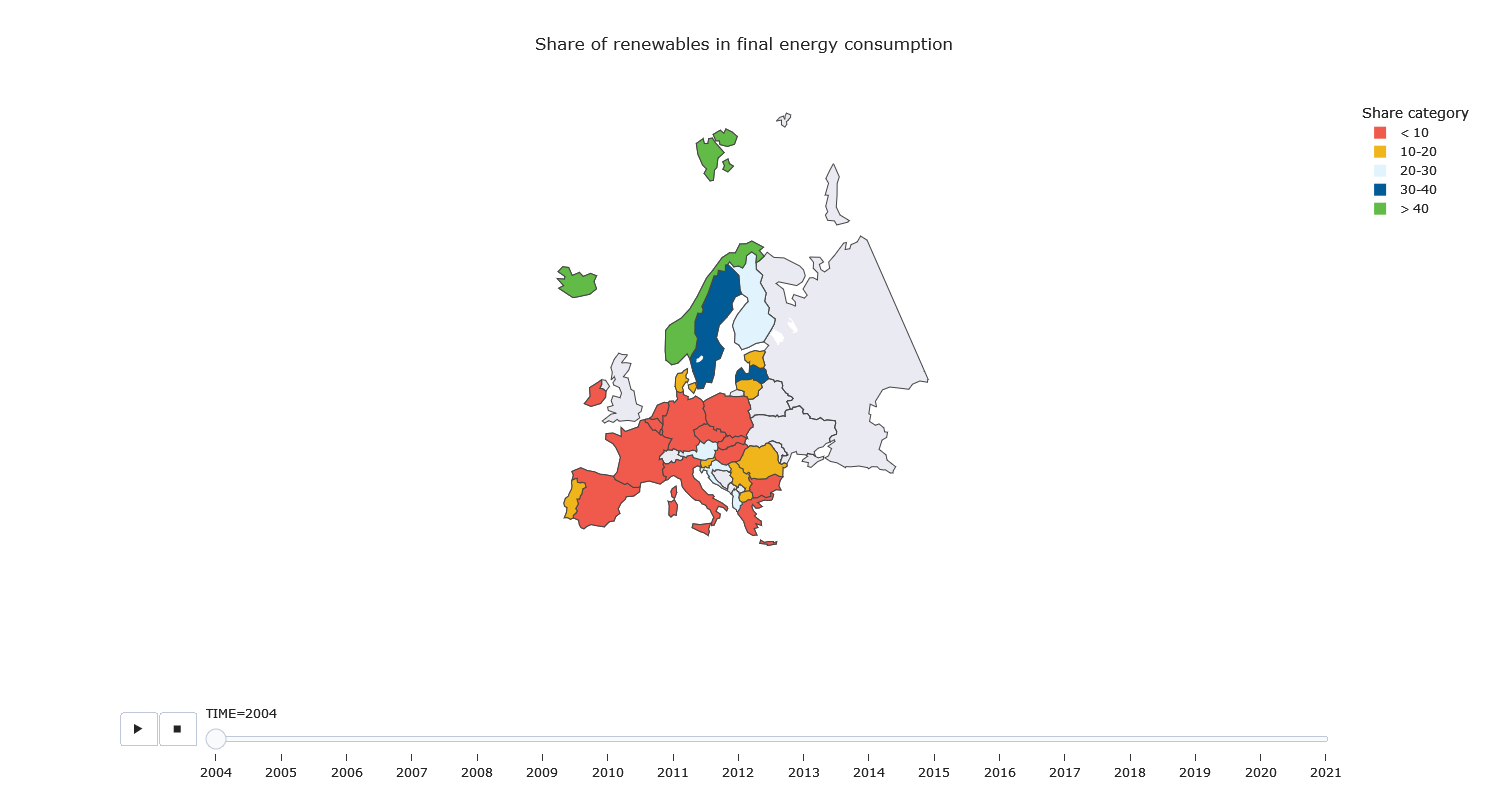

In [99]:
import plotly.express as px
fig = px.choropleth(df_melt,
                    locations='country',
                    color='Share category',
                    locationmode='country names',
                    animation_frame='TIME',
                    hover_name='country',
                    hover_data={col: (False if col not in ['Share category', 'TIME'] else (':.1f' if col == 'Share category' else True)) for col in df_melt.columns},
                    color_discrete_map={label: color for label, color in zip(color_labels, color_sequence)},
                    title='Share of renewables in final energy consumption',
                    height=800,
                    width=1000,
                    scope='europe',
                    category_orders={'Share': color_labels})




fig.update_layout(coloraxis_colorbar=dict(title='Share of renewables'))
fig.update_layout(template='seaborn') 

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1500
fig.show()

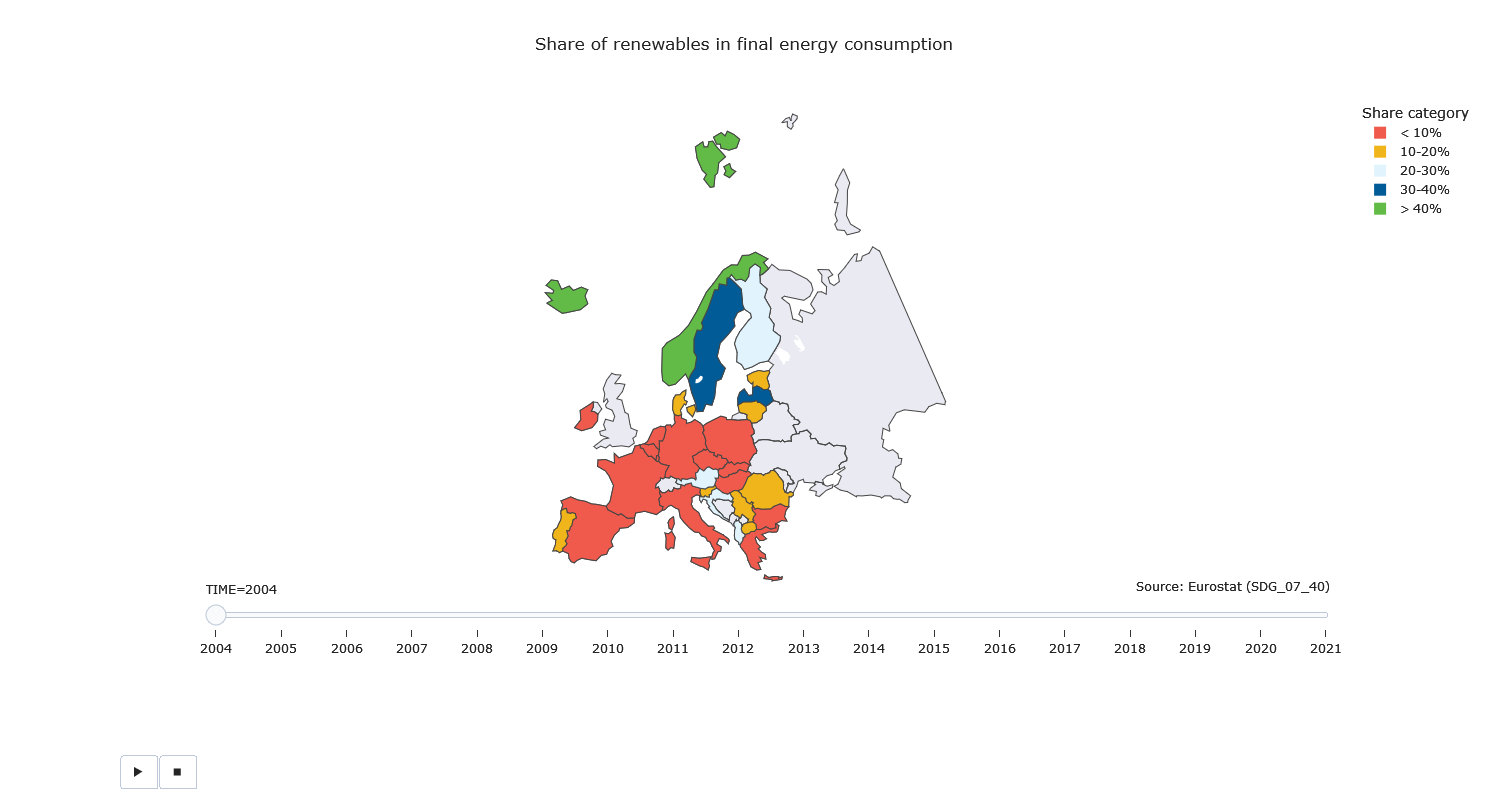

In [114]:
import plotly.express as px

fig = px.choropleth(df_melt,
                    locations='country',
                    color='Share category',
                    locationmode='country names',
                    animation_frame='TIME',
                    hover_name='country',
                    hover_data={col: (False if col not in ['Share category', 'TIME'] else (':.1f' if col == 'Share category' else True)) for col in df_melt.columns},
                    color_discrete_map={label: color for label, color in zip(color_labels, color_sequence)},
                    title='Share of renewables in final energy consumption',
                    height=800,
                    width=1000,
                    scope='europe',
                    category_orders={'Share': color_labels})

fig.update_layout(coloraxis_colorbar=dict(title='Share of renewables'))
fig.update_layout(template='seaborn') 
fig.add_annotation(
    x=1,
    y=0.15,
    xref="paper",
    yref="paper",
    text="Source: Eurostat (SDG_07_40)",
    showarrow=False,
    font=dict(size=12),
)


# Update slider parameters in layout
for slider in fig.layout.sliders:
    slider.pad.t = 10  # Reduce top padding to 10 pixels
    slider.y = 0.2  # Move the slider up

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1500
fig.show()
